# VR Controller Data Analysis

## Introduction

Which VR controller is better?

Task: Selection in 3D (easy, medium, hard)

- IV1: Controller (2 levels: H, C)
- IV2: Task difficulty (3 levels: E, M, H)
- 6 Conditions:  HE,HM,HH,CE,CM,CH
- Within-subject 
- DV1: Time to select target
- DV2: Wrongly selected target
- DV3: Perceived task load (preference)

## Load Data and Package

In [45]:
# Import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

In [46]:
# Load the dataset
df = pd.read_csv("dataset.csv")

# Display the first few rows of the data
df.head()

,Participant,Condition,Controller,Task_Difficulty,Time_to_Select,Wrongly_Selected_Target,Perceived_Task_Load
0,1,HE,Hand,Easy,5.548357,0,5
1,1,CE,Controller,Easy,4.730868,0,2
2,1,HM,Hand,Medium,6.639521,1,3
3,1,CM,Controller,Medium,6.005258,0,5
4,1,HH,Hand,Hard,7.209561,1,1


## Hypothesis 1

- *H1.1*: For easy tasks, controller A is faster than controller B.
- *H1.1_0*: For easy tasks, there is no difference in speed between controller A and B

- *H1.2*: For medium tasks, controller A is faster than controller B.
- *H1.2_0*: For medium tasks, there is no difference in speed between controller A and B

- *H1.3*: For hard tasks, controller A is faster than controller B.
- *H1.3_0*: For hard tasks, there is no difference in speed between controller A and B

### Step 1. Check properties of your data

#### 1.1 Isolating the data from task difficulty


In [47]:
easy_task_data = df[df['Task_Difficulty'] == 'Easy']
easy_task_data.head()

,Participant,Condition,Controller,Task_Difficulty,Time_to_Select,Wrongly_Selected_Target,Perceived_Task_Load
0,1,HE,Hand,Easy,5.548357,0,5
1,1,CE,Controller,Easy,4.730868,0,2
6,2,HE,Hand,Easy,3.993725,1,3
7,2,CE,Controller,Easy,5.275185,1,2
12,3,HE,Hand,Easy,4.999873,2,2


In [48]:
medium_task_data = df[df['Task_Difficulty'] == 'Medium']
medium_task_data.head()

,Participant,Condition,Controller,Task_Difficulty,Time_to_Select,Wrongly_Selected_Target,Perceived_Task_Load
2,1,HM,Hand,Medium,6.639521,1,3
3,1,CM,Controller,Medium,6.005258,0,5
8,2,HM,Hand,Medium,6.374478,1,3
9,2,CM,Controller,Medium,5.418066,0,4
14,3,HM,Hand,Medium,5.989224,4,3


In [49]:
hard_task_data = df[df['Task_Difficulty'] == 'Hard']
hard_task_data.head()

,Participant,Condition,Controller,Task_Difficulty,Time_to_Select,Wrongly_Selected_Target,Perceived_Task_Load
4,1,HH,Hand,Hard,7.209561,1,1
5,1,CH,Controller,Hard,5.737415,1,2
10,2,HH,Hand,Hard,7.227809,1,5
11,2,CH,Controller,Hard,6.055461,1,2
16,3,HH,Hand,Hard,7.911272,0,2


#### 1.2 Descriptive Statistics

In [50]:
# Get descriptive statistics for the easy task condition, grouped by controller

easy_task_data.groupby('Controller')[['Time_to_Select']].describe()

Time_to_Select                                                    \
                    count      mean       std       min       25%       50%   
Controller                                                                    
Controller           30.0  4.958084  0.430834  4.054013  4.747481  4.938442   
Hand                 30.0  5.191489  0.566522  3.860272  5.001234  5.298533   

                                
                 75%       max  
Controller                      
Controller  5.215430  5.973998  
Hand        5.580385  6.131885

In [51]:
medium_task_data.groupby('Controller')[['Time_to_Select']].describe()

Time_to_Select                                                    \
                    count      mean       std       min       25%       50%   
Controller                                                                    
Controller           30.0  5.678547  0.456007  4.844338  5.409307  5.662223   
Hand                 30.0  6.521517  0.432965  5.760739  6.215787  6.513338   

                                
                 75%       max  
Controller                      
Controller  5.934727  6.860085  
Hand        6.813805  7.466920

In [52]:
hard_task_data.groupby('Controller')[['Time_to_Select']].describe()

Time_to_Select                                                    \
                    count      mean       std       min       25%       50%   
Controller                                                                    
Controller           30.0  6.100631  0.574214  5.290019  5.666940  6.057475   
Hand                 30.0  7.397409  0.478232  6.481462  7.094336  7.364926   

                                
                 75%       max  
Controller                      
Controller  6.495412  7.626993  
Hand        7.752051  8.271534

#### 1.3 Visualize Distributions

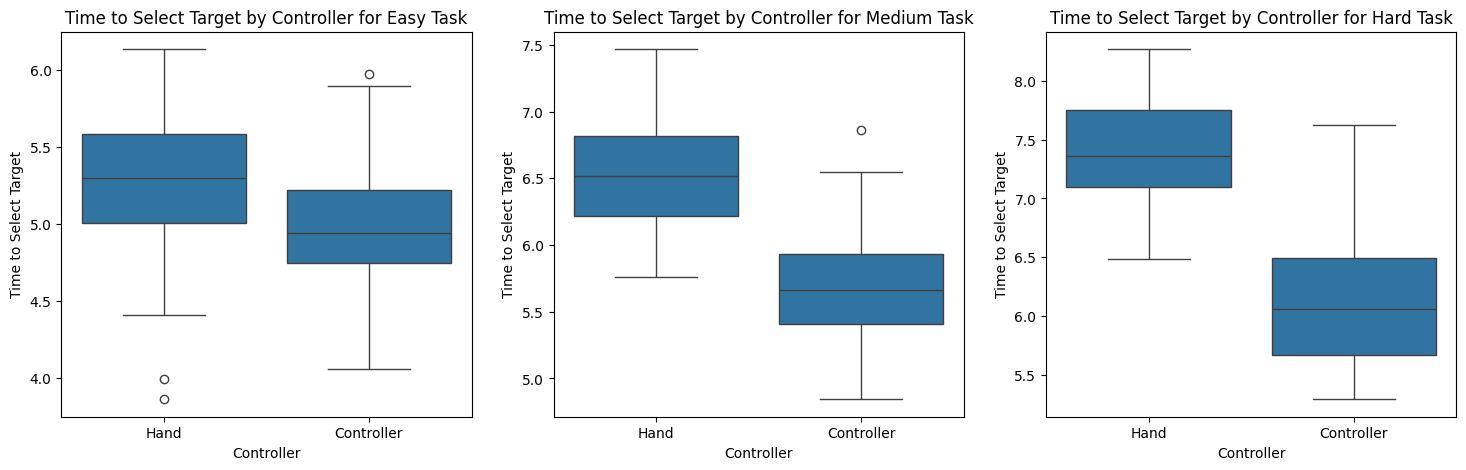

In [53]:
# Visualize the spread and central tendency for Time to Select  -- use boxplot

# List of dataframes and task names for labeling
task_data = [easy_task_data, medium_task_data, hard_task_data]
task_names = ["Easy Task", "Medium Task", "Hard Task"]

# Set up a figure with 3 subplots
plt.figure(figsize=(18, 5))

# Loop through each dataset and create a boxplot for each
for i, (data, task_name) in enumerate(zip(task_data, task_names), 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x="Controller", y="Time_to_Select", data=data)
    plt.title(f"Time to Select Target by Controller for {task_name}")
    plt.xlabel("Controller")
    plt.ylabel("Time to Select Target")

plt.show()

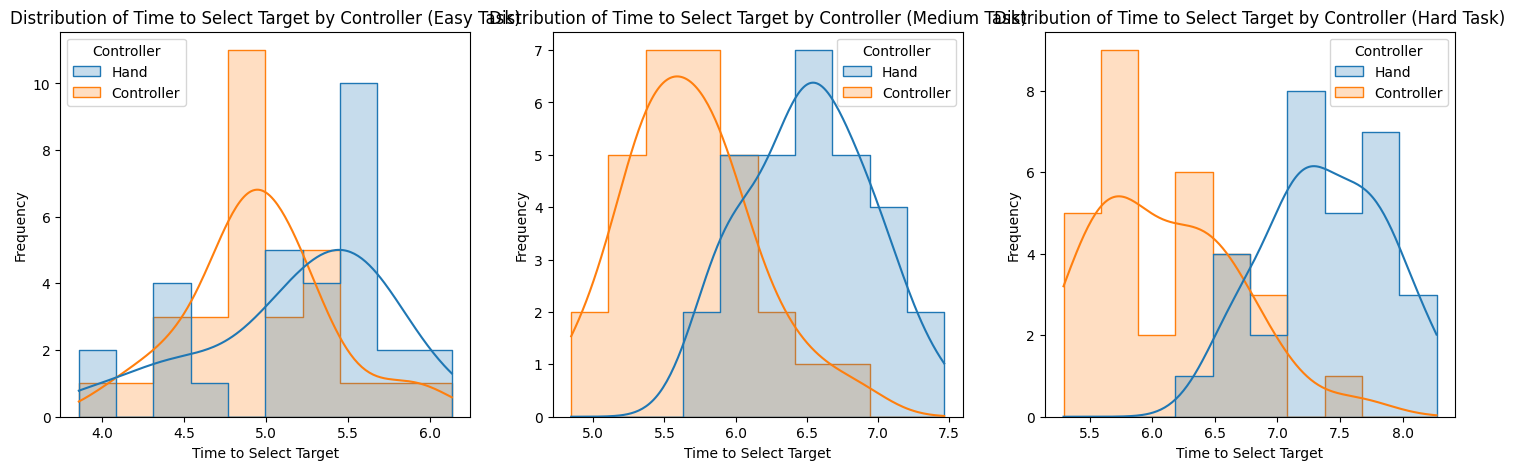

In [54]:
# Show the frequency distribution of data using histogram

# Set up a figure with 3 subplots
plt.figure(figsize=(18, 5))

# Loop through each dataset and create a histogram for each
for i, (data, task_name) in enumerate(zip(task_data, task_names), 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=data, x="Time_to_Select", hue="Controller", kde=True, bins=10, element="step")
    plt.title(f"Distribution of Time to Select Target by Controller ({task_name})")
    plt.xlabel("Time to Select Target")
    plt.ylabel("Frequency")

plt.show()

#### 1.4 Test Normality

In [55]:
# Now we want to gain more confidence of our visual exploration using a statistical measure of normality
from scipy.stats import shapiro

# Shapiro-Wilk test for each controller in the easy task condition
controllers = easy_task_data['Controller'].unique()

for controller in controllers:
    data = easy_task_data[easy_task_data['Controller'] == controller]['Time_to_Select']
    stat, p_value = shapiro(data)
    print(f"{controller} Controller - Shapiro-Wilk Test: Statistic={stat:.3f}, p-value={p_value:.3f}")
    if p_value < 0.05:
        print("The data is likely not normally distributed.")
    else:
        print("The data is likely normally distributed.")

Hand Controller - Shapiro-Wilk Test: Statistic=0.935, p-value=0.067
The data is likely normally distributed.
Controller Controller - Shapiro-Wilk Test: Statistic=0.961, p-value=0.328
The data is likely normally distributed.


In [56]:
# Loop through each dataset and each controller to perform Shapiro-Wilk test
for data, task_name in zip(task_data, task_names):
    print(f"Shapiro-Wilk Test for {task_name} Condition:")
    controllers = data['Controller'].unique()
    for controller in controllers:
        controller_data = data[data['Controller'] == controller]['Time_to_Select']
        stat, p_value = shapiro(controller_data)
        print(f"  {controller} Controller - Statistic={stat:.3f}, p-value={p_value:.3f}")
        if p_value < 0.05:
            print("    The data is likely not normally distributed.")
        else:
            print("    The data is likely normally distributed.")
    print("\n")

Shapiro-Wilk Test for Easy Task Condition:
  Hand Controller - Statistic=0.935, p-value=0.067
    The data is likely normally distributed.
  Controller Controller - Statistic=0.961, p-value=0.328
    The data is likely normally distributed.


Shapiro-Wilk Test for Medium Task Condition:
  Hand Controller - Statistic=0.981, p-value=0.840
    The data is likely normally distributed.
  Controller Controller - Statistic=0.976, p-value=0.705
    The data is likely normally distributed.


Shapiro-Wilk Test for Hard Task Condition:
  Hand Controller - Statistic=0.976, p-value=0.715
    The data is likely normally distributed.
  Controller Controller - Statistic=0.951, p-value=0.175
    The data is likely normally distributed.




### Step 2. Select Statistical Test

- Action: ?
- Parametric vs Non-parametric: ?
- Data Type: ?
- Number of Groups: ?
- Unequal vs Equal Sample Sizes: ?
- Independency of the Sample: ?

Fill in the blanket: **We will conduct a [statistical test] as [data [not] meets assumptions]**

![](decision_tree.jpeg)

We will conduct a related sample t-test as our data holds the following assumption:

- Paired/Dependent: Observations in each pair are related
- Continuous Variable: Dependent variable should be continuous
- Normality of Differences:	Differences between pairs are approximately normal
- Interval Data

### Step 3. Perform Hypothesis Testing

#### 3.1 Calculate p-value

In [57]:
from scipy.stats import ttest_rel

# Separate the time data for each controller
time_a = easy_task_data[easy_task_data['Controller'] == 'Hand']['Time_to_Select']
time_b = easy_task_data[easy_task_data['Controller'] == 'Controller']['Time_to_Select']

stat, p_value = ttest_rel(time_a, time_b)
print("Paired t-test results for Time to Select Target (Easy Task):")
print(f"t-statistic: {stat:.3f}, p-value: {p_value:.3f}")

Paired t-test results for Time to Select Target (Easy Task):
t-statistic: 1.974, p-value: 0.058


In [58]:
# Loop through each dataset and perform paired t-test for each task difficulty level
for data, task_name in zip(task_data, task_names):
    # Separate the time data for each controller
    time_hand = data[data['Controller'] == 'Hand']['Time_to_Select']
    time_controller = data[data['Controller'] == 'Controller']['Time_to_Select']
    
    # Perform paired t-test
    stat, p_value = ttest_rel(time_hand, time_controller)
    print(f"Paired t-test results for Time to Select Target ({task_name}):")
    print(f"t-statistic: {stat:.3f}, p-value: {p_value:.3f}")
    
    # Interpret results
    if p_value < 0.05:
        print(f"There is a statistically significant difference in Time to Select between Hand and Controller for the {task_name}.\n")
    else:
        print(f"There is no statistically significant difference in Time to Select between Hand and Controller for the {task_name}.\n")

Paired t-test results for Time to Select Target (Easy Task):
t-statistic: 1.974, p-value: 0.058
There is no statistically significant difference in Time to Select between Hand and Controller for the Easy Task.

Paired t-test results for Time to Select Target (Medium Task):
t-statistic: 7.803, p-value: 0.000
There is a statistically significant difference in Time to Select between Hand and Controller for the Medium Task.

Paired t-test results for Time to Select Target (Hard Task):
t-statistic: 9.398, p-value: 0.000
There is a statistically significant difference in Time to Select between Hand and Controller for the Hard Task.



**Result interpretation** 

There is no statistically significant difference in Time to Select between Controller A and B for the easy task.

#### Step 4. Write up the results

**Template**

To compare the effect of the [independent variable] on the [dependent variable], we conducted a [statistical test] as [data [not] meets assumptions]. 

With [condition A, … (M = XX, SD = X)]. With [condition B, (M = XX, SD = XX]. 

The mean difference between the two groups was [statistically [not]] significant; [DOF of test, p-value, etc].

These results indicate that [condition A was … than condition B]. 	

**Our Results**

[easy tasks]

To compare the effect of the controller type on the time to select a target for easy tasks, we conducted a paired t-test, as the data met the assumptions of normality (Hand: W=0.935, p=0.067; Controller: W=0.961, p=0.328). 

For the hand controller, the mean time to select was M=5.19, SD=0.57. For the physical controller, the mean time was M=4.96, SD=0.43

The mean difference between the two groups was not statistically significant, t(29)=1.974, p=0.058. 

These results indicate that there was no significant difference in time to select a target between the hand and physical controllers for the easy task condition.

## Hypothesis 2

- *H2*: Using controller A produces less errors than controller B
- *H2_0*: There is no difference in errors between controller A and B

Feel free to practice on your own!

In [60]:
# hypothesis 2 

## Hypothesis 3

- *H3*: Using controller A produces less task load than controller B
- *H3_0*: There is no difference in task load between controller A and B

Feel free to practice on your own!

In [59]:
# hypothesis 3

## More Examples

### Study 1: Comparing Two Teaching Methods

A school implements two different teaching methods (Method A and Method B) and evaluates their impact on students' test scores. Half of the students are taught using Method A, while the other half are taught using Method B. The goal is to determine which method results in higher test scores.

Question: Which test should you use to compare the effectiveness of the two teaching methods?

----
Answer: 
- **Independent Variable**: Teaching method (A, B; between-subjects).
- **Dependent Variable**: Test scores (continuous).
- **Hypothesis**: Students taught using Method A will score higher than those taught using Method B.
- **Expected Test**: Independent-samples t-test.

### Study 2: Comparing Stress Levels

A group of employees participates in a six-week mindfulness program. Their stress levels are measured at the beginning and at the end of the program. The researcher wants to determine if the program effectively reduces stress.

Question: How would you analyze whether the mindfulness program reduces stress levels?


----
Answer:

- **Independent Variable**: Time (Pre-program, Post-program; within-subjects).
- **Dependent Variable**: Stress levels (continuous).
- **Hypothesis**: Stress levels will decrease after the mindfulness program.
- **Expected Test**: Paired-samples t-test (Related-samples t-test)

### Study 3: Ad Effectiveness Across Age Groups

A company tests two types of advertisements (visual and textual) on individuals from three age groups (18–25, 26–40, 41+). Participants are exposed to one type of ad and their click-through rates are recorded. The researcher is interested in whether ad type and age group influence click-through rates.

Question: What statistical approach would you use to evaluate the influence of ad type and age group?

----
Answer:
- **Independent Variables**: Ad type (Visual, Textual; between-subjects); Age group (18-25, 26-40, 41+; between-subjects).
- **Dependent Variable**: Click-through rate (percentage, continuous).
- **Hypothesis**: Ad effectiveness depends on both the type of ad and the age group.
- **Expected Test**: Two-way ANOVA.

### Study 4:  Exercise and Weight Loss (Optional)

A fitness trainer collects data on how many hours per week clients exercise and their corresponding weight loss over three months. The trainer wants to understand if there’s a relationship between exercise time and weight loss.

Question: What test would you use to analyze the relationship between exercise time and weight loss?

----
Answer:
- **Variables**: Time spent exercising (hours, continuous); Weight loss (kilograms, continuous).
- **Hypothesis**: Greater time spent exercising is associated with greater weight loss.
- **Expected Test**: Pearson correlation

### Study 5: Temperature and Bacterial Growth (Optional)

A scientist observes bacterial growth rates at different temperatures (e.g., 15°C, 25°C, 35°C, 45°C). The goal is to identify whether the growth rate depends on temperature and if the relationship is linear or non-linear.

Question: What statistical method would you use to analyze this data?

----
Answer:

- **Variables**: Temperature (continuous); Growth rate (continuous).
- **Hypothesis**: Bacteria growth follows a non-linear pattern based on temperature.
- **Expected Test**: Polynomial regression.

### Study 6: Drug Recovery Rates (Optional)

A clinical study evaluates whether recovery rates differ between patients using Drug A and Drug B. The number of patients who recover and do not recover is recorded for each drug group.

Question: What test would you use to determine if there’s a difference in recovery rates?

----
Answer:

- **Independent Variable**: Drug type (A, B; between-subjects).
- **Dependent Variable**: Recovery rate (proportion of patients recovered).
- **Hypothesis**: Recovery rates differ between Drug A and Drug B.
- **Expected Test**: Chi-square test of independence.

### Study 7: Effect of Diets Over Time (Optional)

Athletes are assigned one of three diets (Diet A, Diet B, or Diet C). Their performance is measured weekly for four weeks. The researcher wants to analyze how performance changes over time and whether it depends on the type of diet.

Question: How would you analyze this dataset to study the effects of diet and time on performance?

----
Answer:
- **Independent Variables**: Diet type (A, B, C; between-subjects); Time (Week 1, Week 2, Week 3, Week 4; within-subjects).
- **Dependent Variable**: Performance score (continuous).
- **Hypothesis**: Diet effectiveness on performance changes over time.
- **Expected Test**: Two-way repeated-measures ANOVA.
